In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
df = pd.read_csv("C:/Users/hp/Downloads/data/data/benin-malanville.csv") 



In [13]:
print(df)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [21]:
#summary statistics
statistics = df.describe()


print(statistics)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [40]:
# Summary statistics for numeric columns
df[['GHI', 'DNI', 'DHI', 'Tamb']].describe()

,GHI,DNI,DHI,Tamb
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,28.179683
std,331.131327,261.710501,158.691074,5.924297
min,-12.900000,-7.800000,-12.600000,11.000000
25%,-2.000000,-0.500000,-2.100000,24.200000
50%,1.800000,-0.100000,1.600000,28.000000
75%,483.400000,314.200000,216.300000,32.300000
max,1413.000000,952.300000,759.200000,43.800000


In [22]:
#Data quality check

# Check for missing values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [23]:
# Check for duplicates
df.duplicated().sum()

0

In [67]:
# outliers = (zscores > 3).any(axis=1)
outliers = (zscores.abs() > 3).any(axis=1)
outliers.sum()

3811

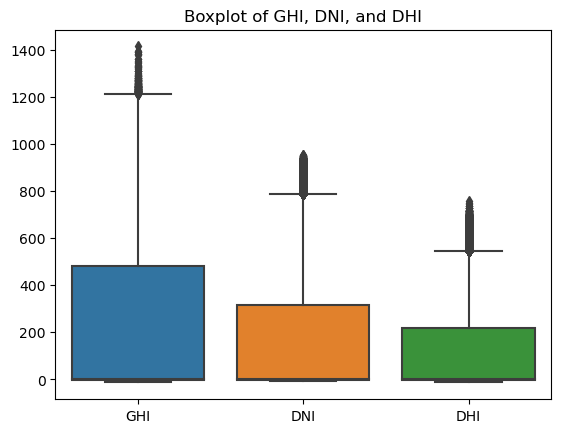

In [68]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of GHI, DNI, and DHI')
plt.show()

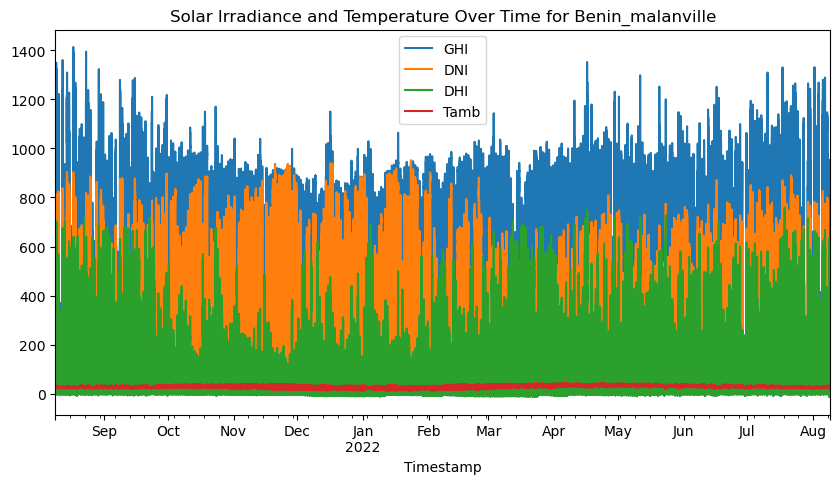

In [64]:
# Plotting time series trends for Benin_malanville dataset for the numeric columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 5), title='Solar Irradiance and Temperature Over Time for Benin_malanville')
plt.show()

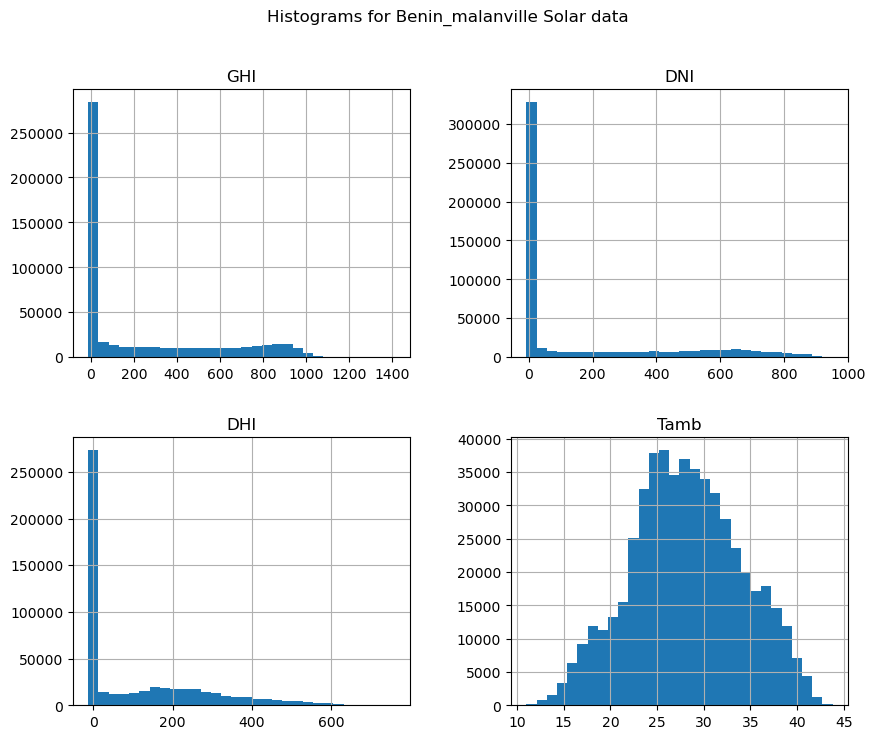

In [65]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms for Benin_malanville Solar data')
plt.show()

In [66]:
from scipy.stats import zscore

zscores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
# zscores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
# zscores = df.apply(zscore)
zscores

,GHI,DNI,DHI
Timestamp,,,
2021-08-09 00:01:00,-0.730102,-0.639591,-0.733873
2021-08-09 00:02:00,-0.729800,-0.639591,-0.733873
2021-08-09 00:03:00,-0.729800,-0.639591,-0.733873
2021-08-09 00:04:00,-0.729800,-0.639209,-0.733243
2021-08-09 00:05:00,-0.729498,-0.639209,-0.733243
...,...,...,...
2022-08-08 23:56:00,-0.743088,-0.639209,-0.764120
2022-08-08 23:57:00,-0.743088,-0.639209,-0.763490
2022-08-08 23:58:00,-0.743088,-0.639209,-0.763490


<Axes: >

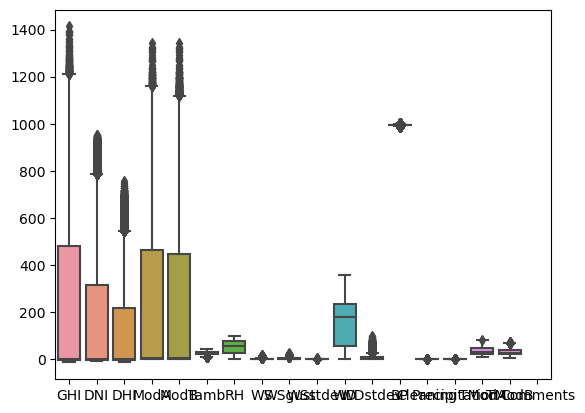

In [69]:
sns.boxplot(data=df)

In [70]:
# missing data forward fill
df.fillna(method='ffill', inplace=True)

In [71]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [72]:
#correlition analysis
correlation = df.corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.882098,0.849549,0.994428,0.994855,0.546475,-0.357267,0.454927,0.481863,0.443930,0.074302,0.545379,0.018966,0.006890,-0.036638,0.919972,0.874081,NaN
DNI,0.882098,1.000000,0.545455,0.891768,0.891757,0.466479,-0.371335,0.394827,0.417305,0.380831,0.013757,0.469314,0.031800,0.009840,-0.032990,0.789888,0.755497,NaN
DHI,0.849549,0.545455,1.000000,0.829431,0.827389,0.502725,-0.281707,0.424314,0.448366,0.411760,0.097518,0.503810,-0.007044,0.012983,-0.035718,0.824539,0.777252,NaN
ModA,0.994428,0.891768,0.829431,1.000000,0.998742,0.525775,-0.380644,0.456110,0.482194,0.440901,0.044738,0.536462,0.040400,0.006457,-0.036165,0.908796,0.855793,NaN
ModB,0.994855,0.891757,0.827389,0.998742,1.000000,0.524274,-0.363039,0.447702,0.474095,0.435915,0.056040,0.536455,0.041919,0.006908,-0.036098,0.911939,0.861946,NaN
Tamb,0.546475,0.466479,0.502725,0.525775,0.524274,1.000000,-0.412743,0.344276,0.359515,0.339021,0.183668,0.467756,-0.553420,-0.010197,-0.045985,0.760989,0.822825,NaN
RH,-0.357267,-0.371335,-0.281707,-0.380644,-0.363039,-0.412743,1.000000,-0.237059,-0.229029,-0.166944,0.296661,-0.210950,0.282406,0.006691,0.074546,-0.340746,-0.316749,NaN
WS,0.454927,0.394827,0.424314,0.456110,0.447702,0.344276,-0.237059,1.000000,0.984456,0.764384,0.230345,0.514399,0.044124,0.007641,0.126971,0.427010,0.397548,NaN
WSgust,0.481863,0.417305,0.448366,0.482194,0.474095,0.359515,-0.229029,0.984456,1.000000,0.839253,0.249050,0.564482,0.043587,0.008290,0.128870,0.456026,0.427189,NaN
WSstdev,0.443930,0.380831,0.411760,0.440901,0.435915,0.339021,-0.166944,0.764384,0.839253,1.000000,0.355001,0.614009,0.020457,0.007756,0.105587,0.437605,0.420045,NaN


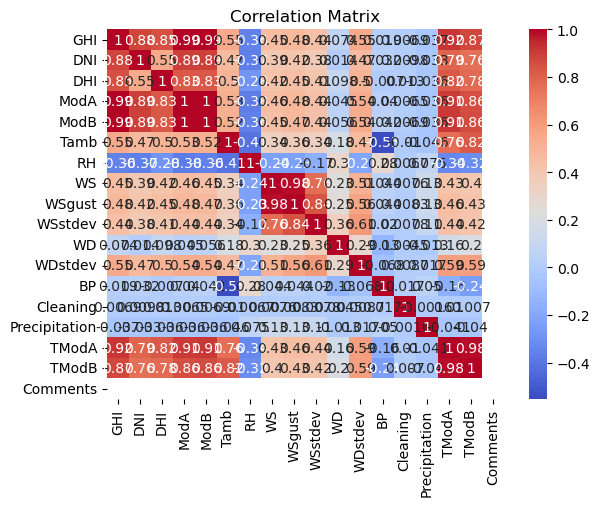

In [73]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

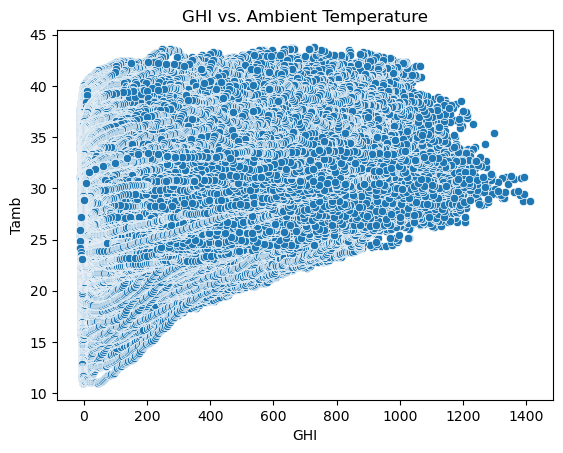

In [74]:
#scatter plot
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('GHI vs. Ambient Temperature')
plt.show()

In [75]:
!pip install windrose

  Obtaining dependency information for windrose from https://files.pythonhosted.org/packages/fb/5e/c27fbd92d635d5ee4789cb91b82e475a59a0dc86eb8a279e3397d4cc8d54/windrose-1.9.2-py3-none-any.whl.metadata


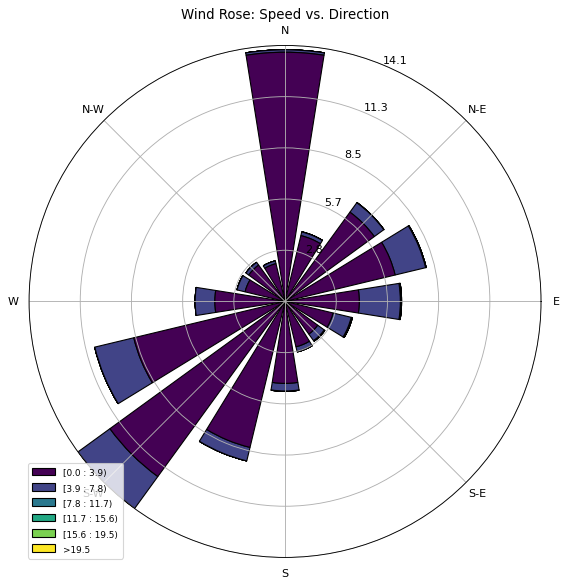

In [76]:
#wind analysis
from windrose import WindroseAxes

# Create a wind rose visualization to analyze speed and direction
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed vs. Direction')
ax.set_legend()
plt.show()

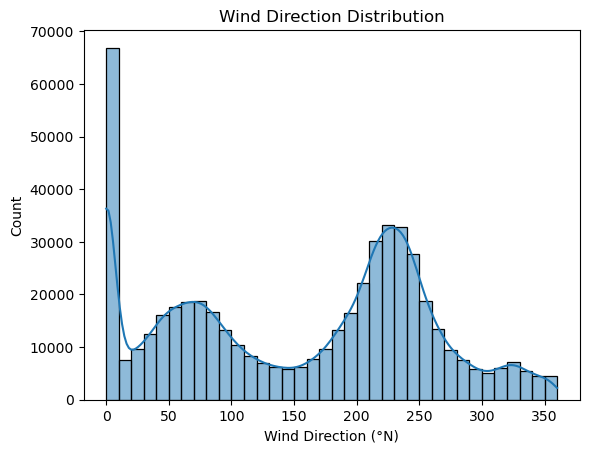

In [77]:
# Analyze wind direction variability
sns.histplot(df['WD'], kde=True, bins=36)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.show()

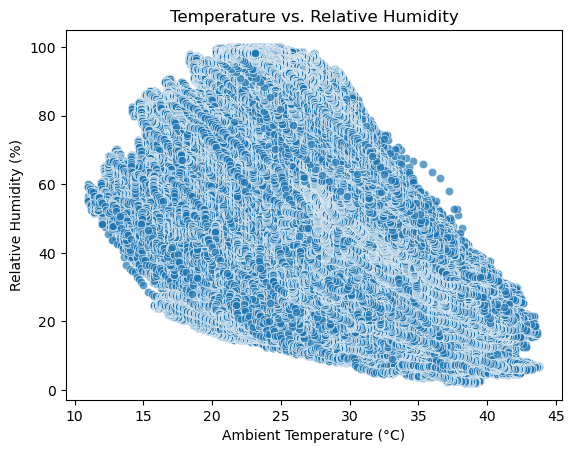

In [78]:
# Analyze the relationship between temperature and relative humidity
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

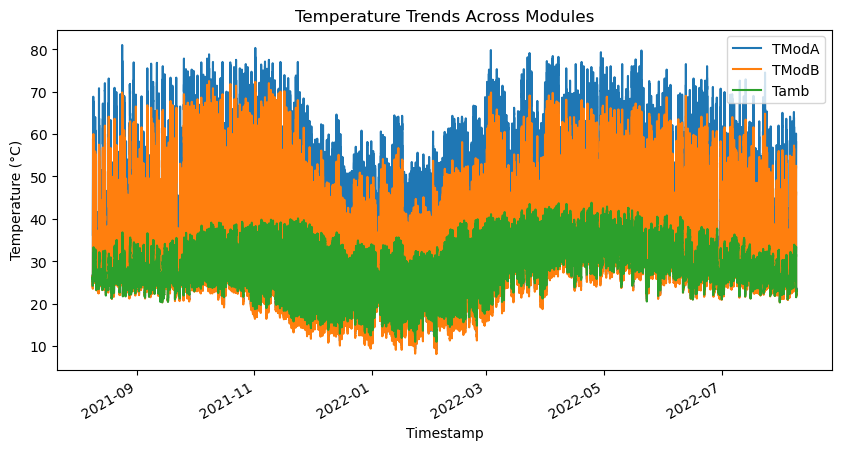

In [79]:
# Investigate temperature variations across modules
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(10, 5))
plt.title('Temperature Trends Across Modules')
plt.ylabel('Temperature (°C)')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


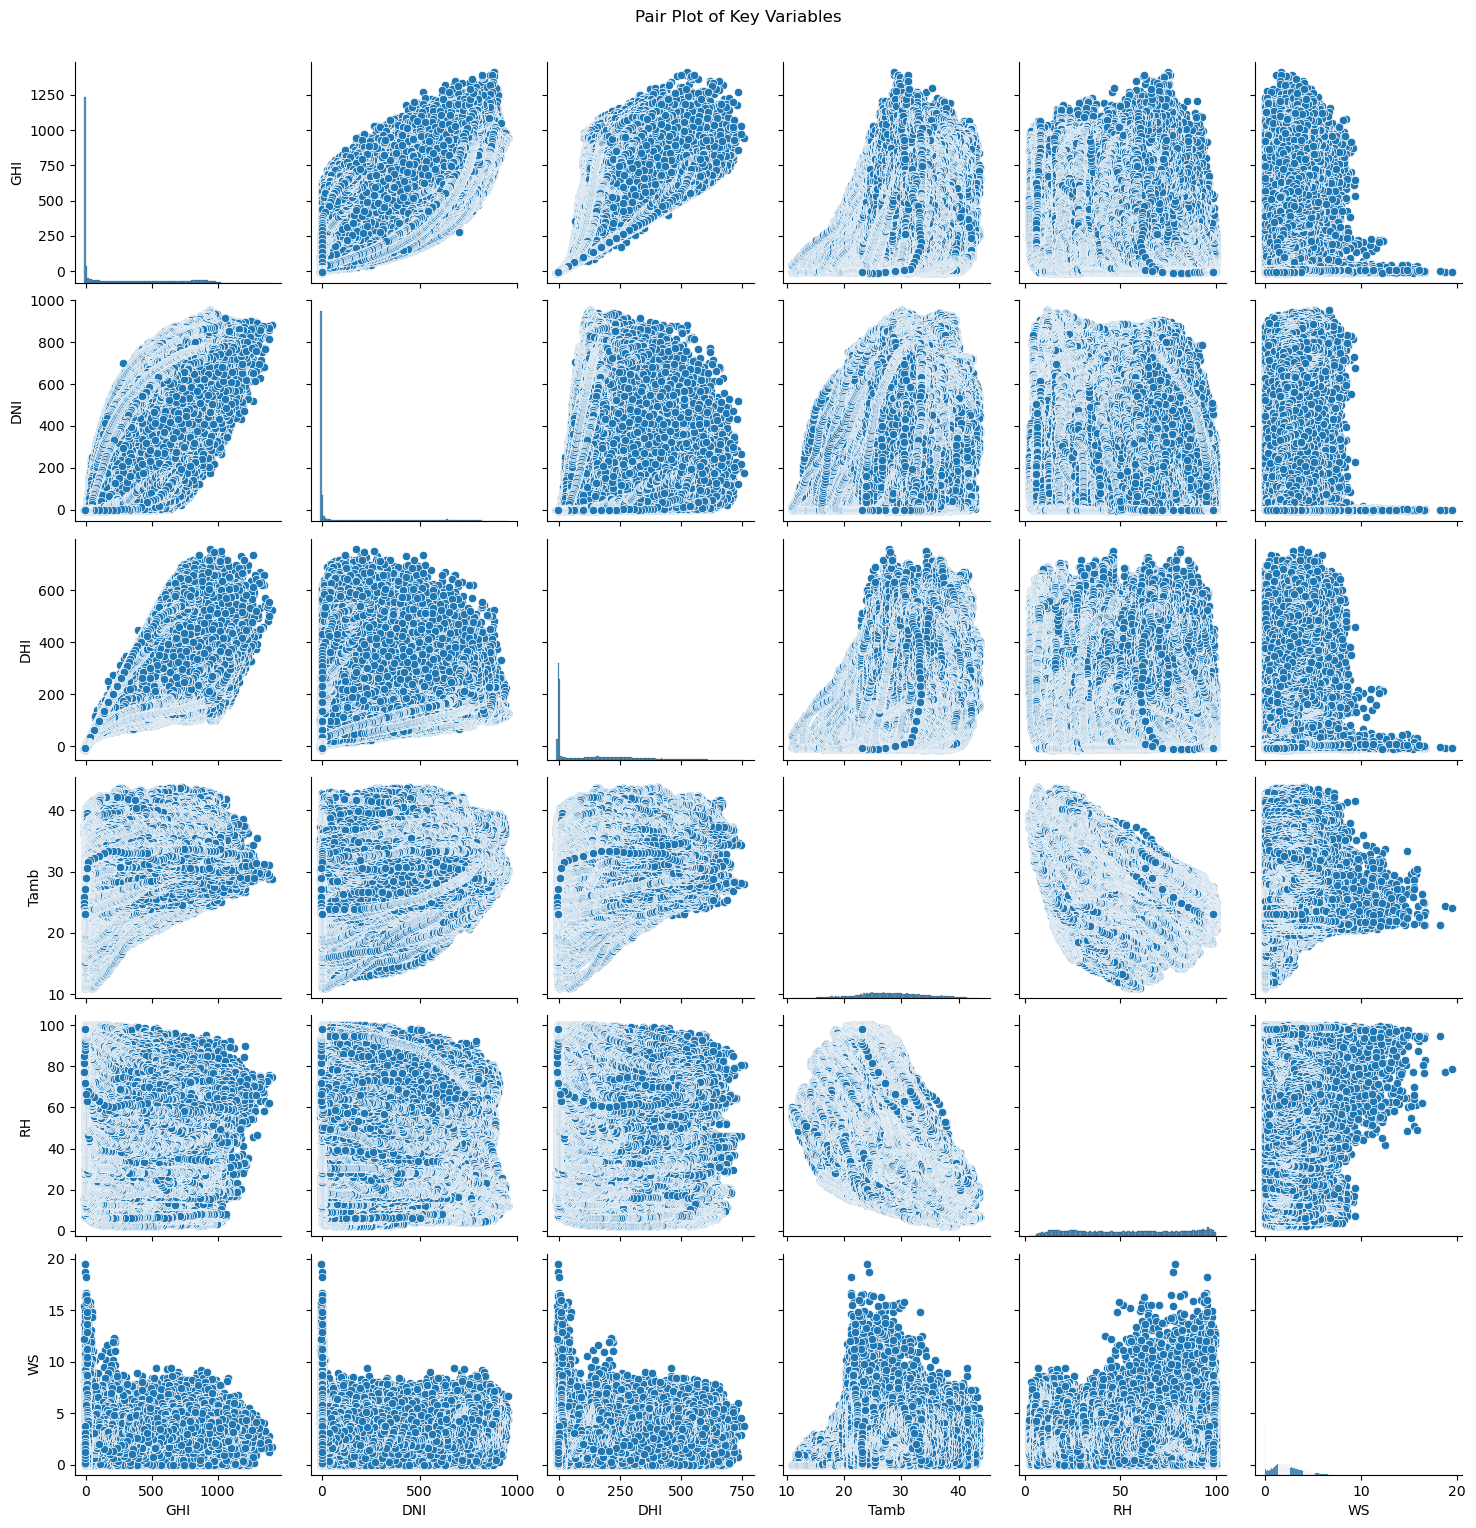

In [80]:
# Generate a pair plot
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [81]:
# Identify strong correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

# Correlation Matrix
correlation_matrix

,GHI,DNI,DHI,Tamb,RH,WS
GHI,1.000000,0.882098,0.849549,0.546475,-0.357267,0.454927
DNI,0.882098,1.000000,0.545455,0.466479,-0.371335,0.394827
DHI,0.849549,0.545455,1.000000,0.502725,-0.281707,0.424314
Tamb,0.546475,0.466479,0.502725,1.000000,-0.412743,0.344276
RH,-0.357267,-0.371335,-0.281707,-0.412743,1.000000,-0.237059
WS,0.454927,0.394827,0.424314,0.344276,-0.237059,1.000000
